In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

LABELS = ["regular", "spam"]

In [75]:
data = pd.read_csv("/content/drive/MyDrive/SMS SPAM/spam.csv",  encoding='latin1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [76]:
data.shape

(5572, 5)

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


Text(0, 0.5, 'Count')

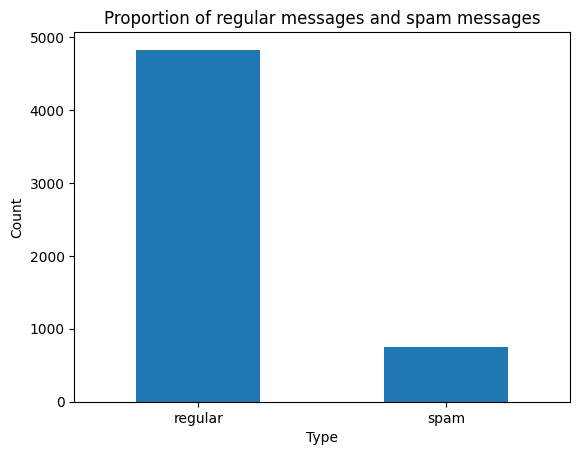

In [78]:
count_classes = pd.value_counts(data['v1'], sort=True)
count_classes.plot(kind='bar', rot=0)
plt.title("Proportion of regular messages and spam messages")
plt.xticks(range(2), LABELS)
plt.xlabel("Type")
plt.ylabel("Count")

In [79]:
X = data['v2']  # Features
y = data['v1']  # Target variable

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
tfidf_vectorizer = TfidfVectorizer(max_features=100, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [82]:
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

MultinomialNB()

In [83]:
predictions = clf.predict(X_test_tfidf)

In [85]:
print("Classification Report:\n", classification_report(y_test, predictions))
accuracy = accuracy_score(y_test, predictions)
print("Model Accuracy:", accuracy)

Classification Report:
               precision    recall  f1-score   support

         ham       0.96      0.99      0.97       965
        spam       0.91      0.71      0.79       150

    accuracy                           0.95      1115
   macro avg       0.93      0.85      0.88      1115
weighted avg       0.95      0.95      0.95      1115

Model Accuracy: 0.9506726457399103
